# **Transfer Learning with TensorFlow Part 2 : Fine-Tuning**

Reference: https://github.com/mrdbourke/tensorflow-deep-learning

In the previous notebook, we covered transfer learning feature extrction, now it's time to learn about a new kind of transfer learning: fine-tuning

## **Table of Content**

<a id="toc"></a>
- [1. Check your device and version](#1)
- [2. Creating helper functions](#2)

<a id="1"></a>
## **Check your device and version**

In [1]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-05-25 09:23:35.468837


In [2]:
# Are we using a GPU?
!nvidia-smi

Thu May 25 09:23:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   36C    P5               25W / 184W|    776MiB / 12288MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

```
Tue May 23 09:26:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.68                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060       WDDM | 00000000:01:00.0  On |                  N/A |
| 32%   35C    P8               22W / 184W|    631MiB / 12288MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
```

In [3]:
import os
print("posix = Linux, nt = windows, java = java")
print("your os name is",os.name)

import platform
print("your os is ",platform.system()+platform.release())

from platform import python_version
print("python version is",python_version())

import tensorflow as tf
print("TensorFlow version is",tf.__version__)

print("Are we using a GPU?",len(tf.config.experimental.list_physical_devices('GPU'))>0)

posix = Linux, nt = windows, java = java
your os name is nt
your os is  Windows10
python version is 3.9.16
TensorFlow version is 2.10.1
Are we using a GPU? True


* posix = Linux, nt = windows, java = java
* your os name is nt
* your os is  Windows10
* python version is 3.9.16
* TensorFlow version is 2.10.1

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
## **Creating helper functions**

In previous notebooks, we've created a bunch of helper functions, now we could rewrite them all, however, this is tedious.

So, it's a good idea to put functions you'll want to use again in a script you can download and import into your notebooks (or elsewhere).

We've done this for some of the functions we've used previously here: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [4]:
# for linux command
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# for windows command
import wget
if os.path.exists("helper_functions.py") != True:
    wget.download('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py')

In [5]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

> 🔑**Note:** If you're running this notebook in Google Colab, when it times out Colab will delete `helper_functions.py`, so you'll have to redownload it if you want access to your helper functions.

## **Let's get some data**

This time we're going to see how we can use the pretrained models whithin `tf.keras.applications` and apply them to our own problem (recognizing images of food).

link: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [111]:
# Get 10% of training data of 10 classes of Food101
import wget

if os.path.exists("10_food_classes_10_percent.zip") != True:
    wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip')
    print("Download Scucess")

unzip_data("10_food_classes_10_percent.zip")

Download Scucess


In [112]:
# Clear any logs from previous runs
# 如果要刪除資料夾可以輸入這個指令
# # rm -rf ./tensorflow_hub/ # linux
# !rd /s /q tensorflow_hub  # windows

# 如果要刪除檔案可以輸入這個指令
!del /s /q "10_food_classes_10_percent.zip"  # windows

�R�����ɮ� - c:\Users\chiou\OneDrive\SideProject\Zero-to-Master-tensorflow-pytorch-tutorial-2023\tensorflow\5-transfer-learning-fine-tuning\10_food_classes_10_percent.zip


In [7]:
# Check out how many images and subdirectories are in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [8]:
# Create training and test directory paths

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [9]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.utils.image_dataset_from_directory(
                                        directory = train_dir,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )


test_data = tf.keras.utils.image_dataset_from_directory(
                                        directory = test_dir,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
# Check out the class name of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
    tf.print(images,labels)

[[[[107.801018 81.8010178 46.8010178]
   [99.928566 74.8571396 43.714283]
   [70.8622437 49.93367 28.0051022]
   ...
   [8 8 6]
   [8.07144165 8.07144165 6.07144165]
   [10 10 8]]

  [[109.091835 83.091835 48.0918388]
   [96.6428528 71.5714264 40.4285698]
   [73.7857056 52.8571434 30.9285698]
   ...
   [8.19895935 8.19895935 6.19895935]
   [9.06633854 9.06633854 7.06633854]
   [10.3571777 10.3571777 8.35717773]]

  [[109.280609 83.2806091 48.2806129]
   [98.3010254 73.428566 41.658165]
   [76.0969315 55.1683655 32.3622437]
   ...
   [9 9 7]
   [9.27041817 9.27041817 7.27041864]
   [11.0765381 11.0765381 9.07653809]]

  ...

  [[223.224014 208.438171 168.223846]
   [239.275223 226.846481 191.974014]
   [251.127441 243.627335 212.341537]
   ...
   [221.739517 203.168045 173.6884]
   [207.744598 186.958862 156.815918]
   [187.591339 165.734222 135.086212]]

  [[164.168167 137.953842 104.504921]
   [178.091583 154.724182 122.810959]
   [198.75473 182.229156 150.096558]
   ...
   [191.04040

## **Model 0: Building a transfer learning feature extraction model using the Keras Functional API**

The sequential API is straight-forward, it runs our layers in sequential order

But the functional API gives us more flexibility with our models - https://www.tensorflow.org/guide/keras/functional

In [13]:
# 1. Create base model with tf.keras.app
base_model = tf.keras.applications.EfficientNetB0(include_top=False)    # model is in user/user/.keras/models

# 2. Freeze the base model (so the underlying pre-trained patterns are not update during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs
# (you don't have to for EfficientNet(s), because there is rescaling layer in EfficientNet model)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model:{x.shape}")

# 6. Average pool the outputs of the base model(aggregate all the most important information, reduce number of computations)
# If it's just a layer, x will be placed at the very side, but if it's a sequential model, 
# x will be placed inside the brackets.
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)), # Only 25% of the test data is used because using 100% of the test data for each epoch would take too long.
                                 callbacks=[create_tensorboard_callback(dir_name ="transfer_learning",experiment_name = "10_percent_feature_extraction")])


Shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230525-092347
Epoch 1/5
24/24 [==============================] - 14s 247ms/step - loss: 1.8251 - accuracy: 0.4573 - val_loss: 1.2697 - val_accuracy: 0.7385
Epoch 2/5
24/24 [==============================] - 4s 143ms/step - loss: 1.0710 - accuracy: 0.7680 - val_loss: 0.8454 - val_accuracy: 0.8388
Epoch 3/5
24/24 [==============================] - 3s 142ms/step - loss: 0.7763 - accuracy: 0.8400 - val_loss: 0.7038 - val_accuracy: 0.8503
Epoch 4/5
24/24 [==============================] - 4s 147ms/step - loss: 0.6295 - accuracy: 0.8640 - val_loss: 0.6191 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 4s 147ms/step - loss: 0.5305 - accuracy: 0.8787 - val_loss: 0.5476 - val_accuracy: 0.8766


In [14]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 0.5531 - accuracy: 0.8624


[0.5531173348426819, 0.8623999953269958]

In [15]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [16]:
# How about we get a summary of the base model?

base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [17]:
# How about we get a summary of our whole model?

model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


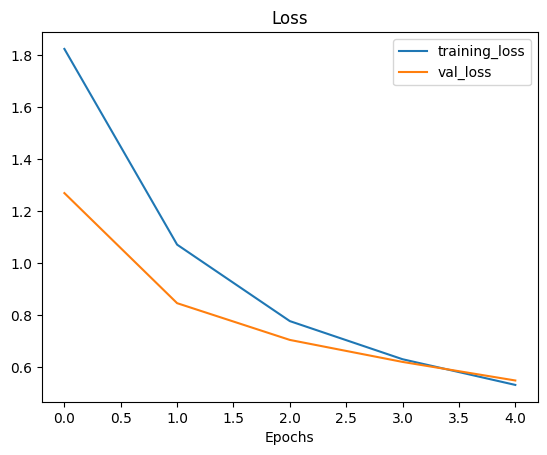

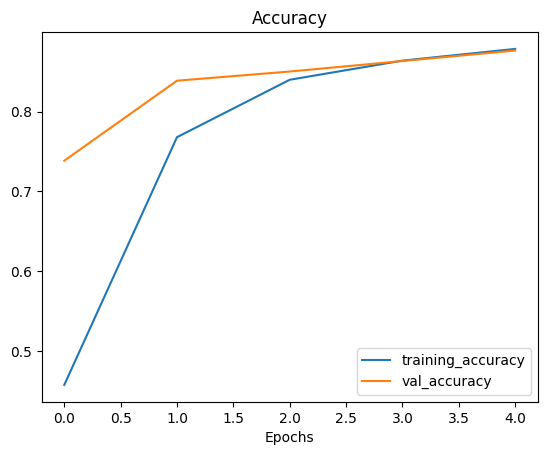

In [18]:
# Check out our model's training cureve

plot_loss_curves(history_10_percent)

## **Getting a feature vector from a trained model**

Let's demonstrate the Golbal Average Pooling 2D Layer.

We have a tensor after our model goes through `base_model` of shape (None, 7, 7, 1280).

But then when it passes through GlobalAveragePooling2D, it truns into (None, 1280).

Let's use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.

In [19]:
# Define the input shape
input_shape = (1,2,2,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n{input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n{global_average_pooled_tensor}\n")


# Check the shape of the different tensors
print(f"Shape of input tensor:{input_tensor.shape}")
print(f"Shape of input tensor:{global_average_pooled_tensor.shape}")

Random input tensor:
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]]

  [[-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]]]

2D global average pooled random tensor:
[[-0.3371175  -1.0493976   0.17876767]]

Shape of input tensor:(1, 2, 2, 3)
Shape of input tensor:(1, 3)


In [20]:
# Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.3371175 , -1.0493976 ,  0.17876767]], dtype=float32)>

經過了2D global average pooled 其實就是feature extraction，AI會知道每個數值代表的意思

>🛠 **Practice:** Try to do the same with the above two cells but this time use `GlobalMaxPool2D`... and see what happens

In [21]:
# 1. Create base model with tf.keras.app
base_model = tf.keras.applications.EfficientNetB0(include_top=False)    # model is in user/user/.keras/models

# 2. Freeze the base model (so the underlying pre-trained patterns are not update during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs
# (you don't have to for EfficientNet(s), because there is rescaling layer in EfficientNet model)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model:{x.shape}")

# 6. max pool the outputs of the base model(aggregate all the most important information, reduce number of computations)
# If it's just a layer, x will be placed at the very side, but if it's a sequential model, 
# x will be placed inside the brackets.
x = tf.keras.layers.GlobalMaxPool2D(name = "global_max_pooling_layer")(x)
print(f"Shape after GlobalMaxPool2D:{x.shape}")


x = tf.keras.layers.Dense(2048,activation = "relu", name = "fully_connection_1")(x)


# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)), # Only 25% of the test data is used because using 100% of the test data for each epoch would take too long.
                                 callbacks=[create_tensorboard_callback(dir_name ="transfer_learning",experiment_name = "10_percent_feature_extraction")])


Shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after GlobalMaxPool2D:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230525-092425
Epoch 1/5
24/24 [==============================] - 11s 227ms/step - loss: 11.2249 - accuracy: 0.3280 - val_loss: 1.4320 - val_accuracy: 0.6135
Epoch 2/5
24/24 [==============================] - 4s 158ms/step - loss: 1.0673 - accuracy: 0.6920 - val_loss: 0.6427 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - 4s 150ms/step - loss: 0.4891 - accuracy: 0.8360 - val_loss: 0.6184 - val_accuracy: 0.7928
Epoch 4/5
24/24 [==============================] - 4s 146ms/step - loss: 0.3379 - accuracy: 0.8893 - val_loss: 0.5920 - val_accuracy: 0.8141
Epoch 5/5
24/24 [==============================] - 4s 147ms/step - loss: 0.1954 - accuracy: 0.9467 - val_loss: 0.7049 - val_accuracy: 0.8092


## **Running a series of transfer learning experiments**

We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the raining data... how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
2. `model_2` - use feature extraction trasfer learning with 10% of the training with data augmentation
3. `model_3` - use fine-tunning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation

> 🔑**Note:** throughout all experiments the same test dataset will be used to evaluate our model...this ensures consistency across

### **Getting and preprocessing data for model_1**

In [22]:
# Download and unzip data

# for linux command
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# for windows command
if os.path.exists("10_food_classes_1_percent.zip") != True:
    wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip')

unzip_data("10_food_classes_1_percent.zip")

In [23]:
# Check out how many images and subdirectories are in our dataset
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [24]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [25]:
# Setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.utils.image_dataset_from_directory(
                                        directory = train_dir_1_percent,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )

test_data = tf.keras.utils.image_dataset_from_directory(
                                        directory = test_dir,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### **Adding data augmentation right into the model**

To add data augmentation right into our models, we can use the layers inside:

* `tf.keras.layers()` - https://www.tensorflow.org/api_docs/python/tf/keras/layers

We can see the benefits of doing this within the TensorFlow Data augmentation documentation: https://www.tensorflow.org/tutorials/images/data_augmentation#two_options_to_use_the_keras_preprocessing_layers

Off the top our of head, after reading the docs, after reading the docs, the benefits of using data augmentation inside the model are:
* Preprocessing of images (augmenting them) happens on the GPU (much faster) rather than the CPU
* Image data augmentation only happens during training, so we can still export our whole model and use it elsewhere.
* If you use [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator), you will use CPU to generate your data.

In [50]:
# Create data augmentation stage with horizontal flipping, rotations, zooms, etc...
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2), 
    #tf.keras.layers.Rescaling(scale=1./255), # keep for models like ResNet50V2 but EfficientNet's having rescaling built-in
],name = "data_augmentation")

### Visualize our data augmentation layer (and see what happens to our data)



In [51]:
# check the class names
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

10_food_classes_1_percent/train/chicken_wings
[[[ 37  32  29]
  [ 36  31  28]
  [ 36  31  28]
  ...
  [  4   0   0]
  [  5   1   0]
  [  6   2   0]]

 [[ 36  31  28]
  [ 36  31  28]
  [ 36  31  28]
  ...
  [  4   0   0]
  [  5   1   0]
  [  6   2   0]]

 [[ 36  31  28]
  [ 36  31  28]
  [ 36  31  28]
  ...
  [  2   1   0]
  [  3   2   0]
  [  4   3   0]]

 ...

 [[127  58   3]
  [136  65   9]
  [137  65   7]
  ...
  [181  74   6]
  [172  67   1]
  [171  66   0]]

 [[133  68  12]
  [126  59   4]
  [124  55   0]
  ...
  [184  79  13]
  [177  72   6]
  [178  73   7]]

 [[172 111  56]
  [135  73  16]
  [117  50   0]
  ...
  [186  81  15]
  [178  73   8]
  [179  76  10]]]
tf.Tensor(
[[[244.13281   249.8525    242.4918   ]
  [243.64444   250.28008   242.46225  ]
  [243.77003   250.77003   242.77003  ]
  ...
  [ 33.05283    33.947605   24.39975  ]
  [ 38.66068    38.390068   30.186356 ]
  [ 44.374557   42.91007    35.041443 ]]

 [[243.77261   250.00282   242.38603  ]
  [243.11452   250.10794 

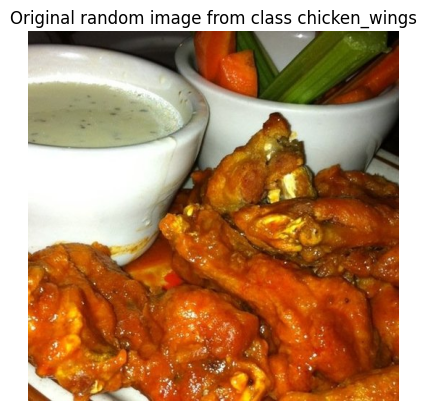

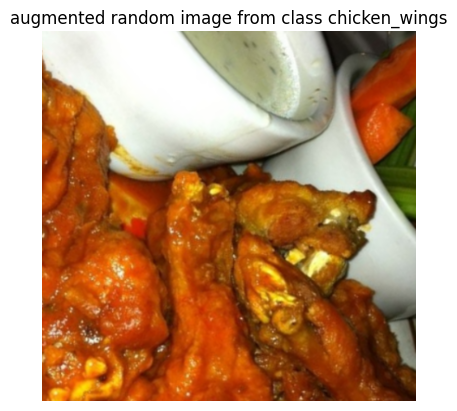

In [52]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
print(target_dir)
random_image = random.choice(os.listdir(target_dir))
randim_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimg.imread(randim_image_path)
print(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")
plt.imshow(img)

# Now let's plot our augmented random image
augmented_image = data_augmentation(img, training = True)
print(augmented_image)
plt.figure()
plt.axis(False)
plt.title(f"augmented random image from class {target_class}")
plt.imshow(augmented_image.numpy().astype(int))


(237, 194, 3)
(260, 187, 3)
(259, 255, 3)
(205, 228, 3)
(250, 247, 3)
(232, 242, 3)
(253, 212, 3)
(257, 262, 3)
(213, 231, 3)


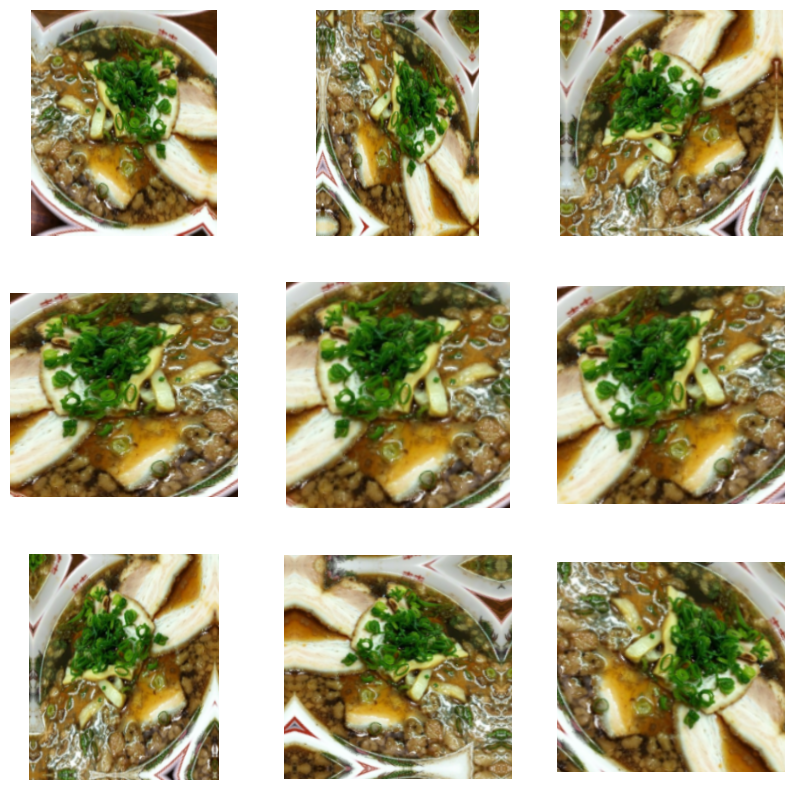

In [53]:
# 也可以一次做資料擴增好幾張
for image, _ in train_data_1_percent.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(first_image,training = True)   # 如果需要增加維度，可以寫 `tf.expand_dims(img, 0).shape`
    print(augmented_image.shape)
    plt.imshow(augmented_image / 255) 
    plt.axis('off')

## **Model 1 : Feature extraction trasfer learning on 1% of the data with data augmentation**

In [54]:
tf.keras.Input

<function keras.engine.input_layer.Input(shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None, ragged=None, type_spec=None, **kwargs)>

In [58]:
# Setup input shape and base model, freezing the base model layer

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)    # model is in user/user/.keras/models
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the input (after augmentation) and don't train it
x = base_model(x, training=False)    # Very similar with `base_model.trainable = False`, jsut rewrite it down here

# Pool output feature of the base 
# If it's just a layer, x will be placed at the very side, but if it's a sequential model, 
# x will be placed inside the brackets.
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

# Put a dnese layer on as the output
outputs = tf.keras.layers.Dense(10, activation="softmax", name = "output_layer")(x)

# Make a model using the inputs and output
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model 
model_1.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# Fit the model and save its history
history_1_percent = model_1.fit(train_data_1_percent,
                                 epochs = 30,
                                 steps_per_epoch = len(train_data_1_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)), # Only 25% of the test data is used because using 100% of the test data for each epoch would take too long.
                                 callbacks=[create_tensorboard_callback(dir_name ="transfer_learning",experiment_name = "1_percent_data_augmentation")])



Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20230525-100448
Epoch 1/30
3/3 [==============================] - 13s 2s/step - loss: 2.4105 - accuracy: 0.1000 - val_loss: 2.2589 - val_accuracy: 0.1678
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 2.1509 - accuracy: 0.1857 - val_loss: 2.1087 - val_accuracy: 0.2911
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 1.9340 - accuracy: 0.3429 - val_loss: 2.0215 - val_accuracy: 0.3454
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 1.7886 - accuracy: 0.4857 - val_loss: 1.9268 - val_accuracy: 0.4095
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 1.6214 - accuracy: 0.6143 - val_loss: 1.8439 - val_accuracy: 0.4655
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.4773 - accuracy: 0.6857 - val_loss: 1.7505 - val_accuracy: 0.4918
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 1.3329 - accu

In [59]:
# Check out a model summary

model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-train

In [60]:
# Evuluate all test dataset
model_1.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 1.0178 - accuracy: 0.7128


[1.0178296566009521, 0.7128000259399414]

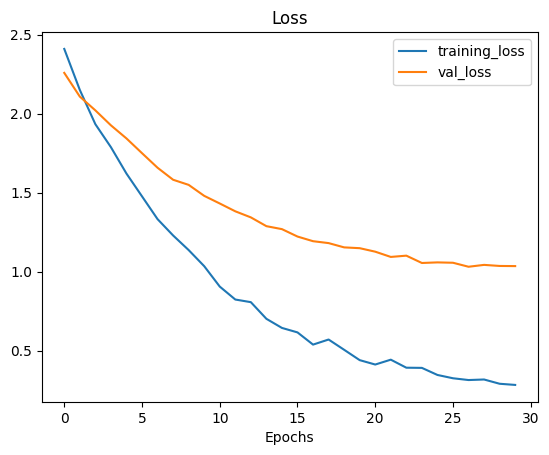

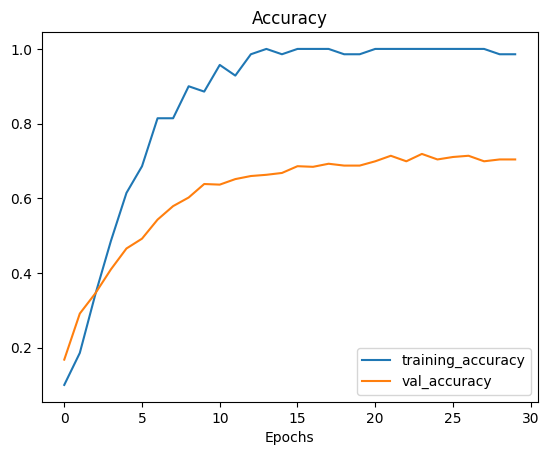

In [61]:
# How do the model with 1% of the and data augmentation loss curves look?

plot_loss_curves(history_1_percent)

## **Model 2 : Feature extraction trasfer learning on 10% of the data with data augmentation**

In [63]:
# get 10% of data (uncomment if you don't have it)

train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [86]:
# Set data inputs
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(
                                        directory = train_dir_10_percent,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )


test_data = tf.keras.utils.image_dataset_from_directory(
                                        directory = test_dir,
                                        labels='inferred',
                                        label_mode='categorical',
                                        class_names=None,
                                        color_mode='rgb',
                                        batch_size = BATCH_SIZE,
                                        image_size = IMG_SIZE,
                                        shuffle=True,
                                        seed=None,
                                        validation_split=None,
                                        subset=None,
                                        interpolation='bilinear',
                                        follow_links=False,
                                        crop_to_aspect_ratio=False,
                                    )


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [87]:
# How many images are in our directory
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [90]:
# check the file structure
import os

def list_files(startpath, show_file = False):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        if show_file == True:
            for f in files:
                print('{}{}'.format(subindent, f))

list_files("10_food_classes_10_percent", show_file = False)

10_food_classes_10_percent/
    test/
        chicken_curry/
        chicken_wings/
        fried_rice/
        grilled_salmon/
        hamburger/
        ice_cream/
        pizza/
        ramen/
        steak/
        sushi/
    train/
        chicken_curry/
        chicken_wings/
        fried_rice/
        grilled_salmon/
        hamburger/
        ice_cream/
        pizza/
        ramen/
        steak/
        sushi/


In [105]:
# Create model 2 with data augmentation built in

# Build data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.2),
    # tf.keras.layers.Rescaling(scale=1./255) # if you are using a model such as ResNet,  you'll need to rescale your data, efficientnet has rescaling built-in
], name= "data_augmentation")

# Setup the input shape to our model
input_shape = (224,224,3)

# Create a fronzen base model (alse called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the inputs and outputs (including the layers in between)
inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs, training = True)   # augment our training image (augmentation doesn't occur on test data)

# pass augmented image to base model but keep it in inference mode, this also insures BatchNormalization layers don't get updated
# https://keras.io/guides/transfer_learning/#build-a-model
x = base_model(x, training = False) 

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_2D")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name = "output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss = "categorical_crossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

In [106]:
# from top to bottom: input_layer -> data_augmentation -> EfficientNetB0. 
# The input_layer serves as the input to the data_augmentation layer, 
# and the output of data_augmentation is then passed to the EfficientNetB0 model.
model_2.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-train